D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/result第二版.pptx
vRIC-seq数据上游分析结果可视化

Figure 1a 原始数据清洗
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/data/result.xlsx/sheet1
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure1a.pdf
代码：无

Figure 1b 测序数据比对情况
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/data/PDCoV-rep1.genome.starChimeric.out.junction
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/data/PDCoV-rep2.genome.starChimeric.out.junction
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/data/result.xlsx/sheet4,5,6,7
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure1brep1.pdf
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure1brep2.pdf
代码：python,BASIC-three_dimensional_data1,数据处理
	 R,Distribution of reads in PDCoV vRIC-seq sequencing data,可视化

In [37]:
##处理PDCoV.genome.starChimeric.out.junction文件,找出交互reads
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/")
from plotly.offline import plot
from IPython.display import IFrame
import pandas as pd
import numpy as np
import shutil#os模块的补充，提供了复制、移动、删除、压缩、解压等操作
from tabulate import tabulate#打印漂亮的表格数据
import matplotlib.pyplot as plt

In [38]:
junction=pd.read_csv('PEDV.genome.starChimeric.out.junction', sep='\t',header=None)

In [43]:
#统计 host to virus reads number
# junction_v2h=junction[(junction[0]!="KT336560.1") | (junction[3]!="KT336560.1")]
junction_h2v=junction[(junction[0]!="MK584552.1") | (junction[3]!="MK584552.1")]
len(junction_h2v)

223941

In [48]:
#统计 virus to virus reads number
junction_v2v=junction[ (junction[0]=="MK584552.1") | (junction[3]=="MK584552.1")]
len(junction_v2v)

521

In [44]:
#统计 host to host reads number
junction_h2h=junction[ (junction[0]!="MK584552.1") & (junction[3]!="MK584552.1")]
len(junction_h2h)

223472

In [47]:
109616/1388306

0.07895665652961235

In [49]:
521/1388306

0.0003752774964597142

In [50]:
(1388306-109616-521)/1388306

0.9206680659739279

Figure 2a 有效嵌合reads占比
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/data/result.xlsx/sheet8
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2a
代码：无

Figure 2b 统计有效Chimeric reads 远距离连接位点处胞嘧啶的占比
输入：GenomeChimeric.out.processed.sam
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/reconstruct_reads.pl
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/find_fusion_point.pl
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2b
代码：linux,数据处理
	 python,BASIC-three_dimensional_data1,数据处理+可视化

perl ../../reconstruct_reads.pl 27_read1_toGenomeChimeric.out.processed.sam kt336560.1.fasta read2
perl ../../reconstruct_reads.pl 30_read1_toGenomeChimeric.out.processed.sam kt336560.1.fasta read1
perl ../../find_fusion_point.pl read1.read_RNA_RNA_MM.fq > 27_read1_fusion_MM.fq
perl ../../find_fusion_point.pl read1.read_RNA_RNA_MP.fq > 27_read1_fusion_MP.fq
perl ../../find_fusion_point.pl read1.read_RNA_RNA_PM.fq > 27_read1_fusion_PM.fq
perl ../../find_fusion_point.pl read1.read_RNA_RNA_PP.fq > 27_read1_fusion_PP.fq
cat 27_read1_fusion_MM.fq 27_read1_fusion_MP.fq 27_read1_fusion_PM.fq 27_read1_fusion_PP.fq > 27_merge.fq
fastqc 27_merge.fq

In [76]:
content1=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/rep1.txt', sep='\t')
content2=pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/rep2.txt', sep='\t')

In [77]:
column_names = ['Base', 'G']
ccontent1=content1[column_names]
ccontent2=content2[column_names]
ccontent1

,Base,G
0,-20,20.945047
1,-19,22.381208
2,-18,21.760928
3,-17,22.448170
4,-16,21.765333
5,-15,21.582068
6,-14,21.321268
7,-13,21.577663
8,-12,21.715111
9,-11,22.959197


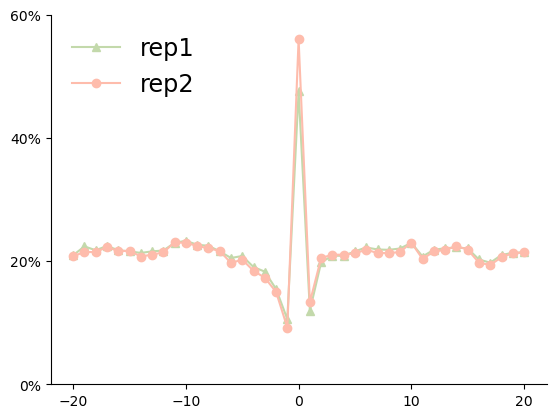

In [81]:
plt.plot(ccontent1['Base'],ccontent1['G'],marker='^',color='#C3D9AB',label='rep1')
plt.plot(ccontent2['Base'],ccontent2['G'],marker='o',color='#FEBCAC',label='rep2')
#FEBCAC
#C3D9AB
plt.xticks(range(-20, 21, 10))
plt.yticks(range(0, 75, 20))
plt.gca().set_yticklabels(['{:.0f}%'.format(val) for val in plt.gca().get_yticks()])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left',fontsize="xx-large",frameon=False)#frameon去除边框

plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/base.pdf')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/base.png')


Figure 2c 统计Chimeric reads覆盖度相关性
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage.txt
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2c
代码：python,BASIC-three_dimensional_data1,数据处理+可视化

In [1]:
import numpy as np
import xlrd
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_dir="D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/"
# file_dir="D:/360MoveData/Users/dgwei/Desktop/"
def get_matrix_npz(M1,M2):
    '''
    transform a three tuple into a matrix
    '''
    S1 = sparse.coo_matrix((M1['value'],(np.asarray(M1['S'], dtype=int),np.asarray(M1['E'], dtype=int)))).toarray()
    S2 = sparse.coo_matrix((M2['value'],(np.asarray(M2['E'], dtype=int),np.asarray(M2['S'], dtype=int)))).toarray()
    matrix = np.zeros((max(S2.shape),max(S1.shape)))
    matrix[np.nonzero(S1)] = S1[np.nonzero(S1)]
    matrix[np.nonzero(S2)] = S2[np.nonzero(S2)]
    return matrix

In [3]:
Sars1 = np.loadtxt(file_dir +'PEDV-1_in_Virion.5nt.raw.matrix', usecols=[0,1,2], dtype=[('S','<i4'),('E','<i4'),('value','<f8')])
res = 5
Sars1['S'] = Sars1['S'] / res
Sars1['E'] = Sars1['E'] / res
ma_Sars1 = get_matrix_npz(Sars1,Sars1)

In [4]:
Sars2 = np.loadtxt(file_dir +'PEDV-2_in_Virion.5nt.raw.matrix', usecols=[0,1,2], dtype=[('S','<i4'),('E','<i4'),('value','<f8')])
res = 5
Sars2['S'] = Sars2['S'] / res
Sars2['E'] = Sars2['E'] / res
ma_Sars2 = get_matrix_npz(Sars2,Sars2)

In [5]:
cum_pdcov1 = ma_Sars1.sum(axis=1)
cum_pdcov2 = ma_Sars2.sum(axis=1)

In [7]:
cor = np.corrcoef(np.log10(cum_pdcov1+1),np.log10(cum_pdcov2+1))[0,1]
cor

0.998725757791977

In [23]:
max(np.log2(cum_pdcov1+1))

17.064469118416675

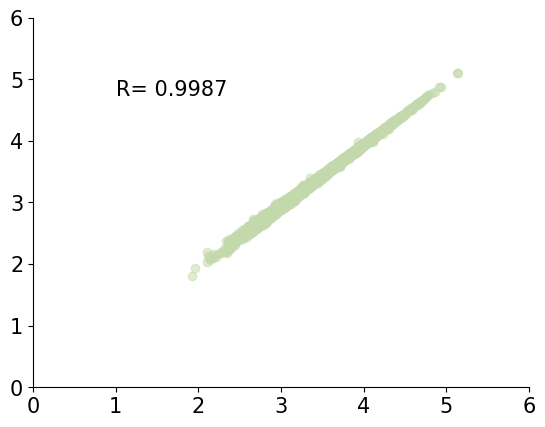

In [12]:
plt.figure()
# plt.scatter(df['coverage1'],df['coverage1'],color='#C3D9AB',alpha=0.5)
plt.scatter(np.log10(cum_pdcov1+1),np.log10(cum_pdcov2+1),color='#C3D9AB',alpha=0.5)

plt.xticks(range(0, 7, 1))
plt.yticks(range(0, 7, 1))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(1, 5, f'R= {cor:.4f}', ha='left', va='top',fontsize=15)

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.rcParams['xtick.color']="b"
# plt.rcParams['ytick.color']="b"
# 设置 x 轴刻度线标记
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,colors='black')
# 设置 y 轴刻度线标记
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,colors='black')
# plt.axvline(x=0, linestyle='dashed', color='#3888C1',alpha=0.5)
# plt.legend(loc='upper right',fontsize="xx-large",frameon=False)#frameon去除边框
x_axis = plt.gca().spines['bottom']
y_axis = plt.gca().spines['left']

# 设置 x 轴和 y 轴的颜色为黑色
x_axis.set_color('black')
y_axis.set_color('black')
# plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/coverage.pdf')
# plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/coverage.png')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/文章/coverage.pdf')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/文章/coverage.png')

Figure 2d 统计Chimeric reads覆盖度相关性
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/30_in_Virion.1nt.none.matrix
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage1.txt
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage2.txt
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage1.roll100.txt
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage2.roll100.txt
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/au_content1.txt
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/au_content2.txt
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2d rep1
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2d rep2
代码：python,BASIC-two_dimensional_data1,统计嵌合reads覆盖度和100nt腺嘌呤和尿嘧啶含量,数据处理
	 R,D:/360MoveData/Users/dgwei/Desktop/script/R/Interaction_strength.R,可视化

Figure 2e 统计不同覆盖度对应的碱基数量
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/chimeric_coverage.txt
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2e
代码：python,BASIC-three_dimensional_data1,数据处理+可视化

In [1]:
import numpy as np
import xlrd
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_dir="D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/"
def get_matrix_npz(M1,M2):
    '''
    transform a three tuple into a matrix
    '''
    S1 = sparse.coo_matrix((M1['value'],(np.asarray(M1['S'], dtype=int),np.asarray(M1['E'], dtype=int)))).toarray()
    S2 = sparse.coo_matrix((M2['value'],(np.asarray(M2['E'], dtype=int),np.asarray(M2['S'], dtype=int)))).toarray()
    matrix = np.zeros((max(S2.shape),max(S1.shape)))
    matrix[np.nonzero(S1)] = S1[np.nonzero(S1)]
    matrix[np.nonzero(S2)] = S2[np.nonzero(S2)]
    return matrix

In [3]:
Sars1 = np.loadtxt(file_dir +'pdcov_in_Virion.5nt.none.matrix', usecols=[0,1,2], dtype=[('S','<i4'),('E','<i4'),('value','<f8')])
res = 5
Sars1['S'] = Sars1['S'] / res
Sars1['E'] = Sars1['E'] / res
ma_Sars1 = get_matrix_npz(Sars1,Sars1)

In [4]:
cum_pdcov1 = ma_Sars1.sum(axis=1)

In [112]:
# sums1 = []
# for column in ma_Sars1:
#     column_sum = column.sum()
#     sums1.append(column_sum)
# sums2 = []
# for column in ma_Sars2:
#     column_sum = column.sum()
#     sums2.append(column_sum)

In [166]:
# column_names1=['coverage1']
# df1 = pd.DataFrame(sums1,columns=column_names1)
# column_names2=['coverage2']
# df2 = pd.DataFrame(sums2,columns=column_names2)
# df=pd.concat([df1,df2],axis=1)
# df

In [67]:
# df['coverage1']=(df['coverage1']/10000).round(1)
# df['coverage2']=(df['coverage2']/10000).round(1)

In [68]:
# df_count1=df['coverage1'].value_counts().sort_index().reset_index()
# df_count2=df['coverage2'].value_counts().sort_index().reset_index()

In [69]:
# df_count1['coverage1']=(df_count1['coverage1']*5)/1000
# df_count2['coverage2']=(df_count2['coverage2']*5)/1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


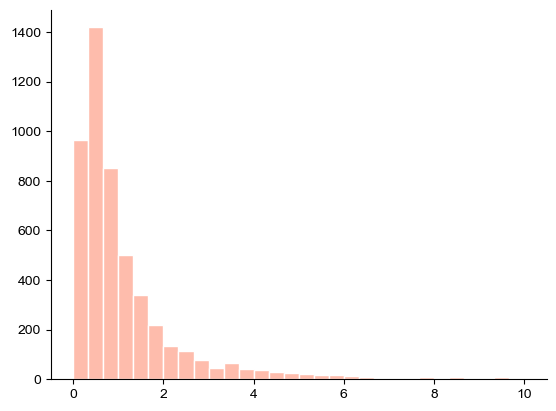

In [5]:
plt.figure()
plt.hist(cum_pdcov1/1000,bins=30,color='#FEBCAC',range=(0,10))
# plt.yticks(range(0, 1050, 200))
# plt.axvline(x=0, linestyle='dashed', color='#3888C1',alpha=0.5)
plt.legend(loc='upper right',fontsize="xx-large",frameon=False)#frameon去除边框

# plt.axhline(y=0, linestyle='dashed', color='#3888C1',alpha=0.5)

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.rcParams['xtick.color']="b"
# plt.rcParams['ytick.color']="b"
# 设置 x 轴刻度线标记
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,colors='black')
# 设置 y 轴刻度线标记
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,colors='black')
# plt.axvline(x=0, linestyle='dashed', color='#3888C1',alpha=0.5)
# plt.legend(loc='upper right',fontsize="xx-large",frameon=False)#frameon去除边框
x_axis = plt.gca().spines['bottom']
y_axis = plt.gca().spines['left']

# 设置 x 轴和 y 轴的颜色为黑色
x_axis.set_color('black')
y_axis.set_color('black')
# plt.savefig('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 2e.pdf')
plt.show()

Figure 3a 交互强度相关性
输入：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/27_in_Virion.1nt.none.matrix
	 D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/30_in_Virion.1nt.none.matrix
输出：D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 3a
代码：R,D:/360MoveData/Users/dgwei/Desktop/script/R/Interaction_strength.R,数据处理+可视化
	 python,BASIC-three_dimensional_data1,数据处理+可视化

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置工作目录
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/")

# 读取数据文件
df1 = pd.read_table("PEDV-1_in_Virion.5nt.raw.matrix", header=None, sep="\t", names=["start", "end", "count"], dtype={"start": str, "end": str, "count": int})
df2 = pd.read_table("PEDV-2_in_Virion.5nt.raw.matrix", header=None, sep="\t", names=["start", "end", "count"], dtype={"start": str, "end": str, "count": int})

# 内连接两个DataFrame
df3 = pd.merge(df1, df2, on=["start", "end"])

# 重命名列名
df3.columns = ["start", "end", "count1", "count2"]

# 对count1和count2取对数
df3["count1"] = np.log10(df3["count1"])
df3["count2"] = np.log10(df3["count2"])

In [27]:
R = df3['count1'].corr(df3['count2'])
R

0.8287256541825634

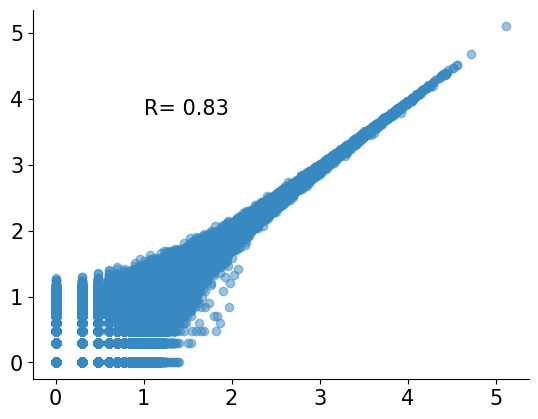

In [29]:
plt.scatter(df3['count1'],df3['count2'],color='#3888C1',alpha=0.5)
# plt.xticks(range(0, 12, 2))
# plt.yticks(range(0, 12, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(1, 4, f'R= {R:.2f}', ha='left', va='top',fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/interaction.pdf')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/interaction.png')

Figure 3b 距离衰减曲线
输入：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/ 27_in_Virion.1nt.none.matrix
	 D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/ 30_in_Virion.1nt.none.matrix
输出：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 3b rep1.pdf
	 D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 3b rep2.pdf
代码：python, BASIC - two_dimensional_data1, 数据处理 + 可视化

Figure 3c 交互矩阵
输入：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/ 27_in_Virion.hic
	 D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/ 30_in_Virion.hic
输出：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 3c rep1.pdf
	 D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 3c rep2.pdf
代码：无
交互矩阵图是用juicer_box直接可视化得到，互作弦图是IGV可视化PDCoV-rep1.igv.bed，保存后用AI提取得到

Figure 4a
输入：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/out1.domains.600.bedpe
输出：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 4a.pdf
代码：python

In [51]:
#直方图展示不同domain的长度
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/")

In [52]:
df = pd.read_table("PEDV.domains-600.bedpe", sep="\t",)
df=df.iloc[:,[6,4,5]]

In [53]:
df['len']=df['y2']-df['y1']

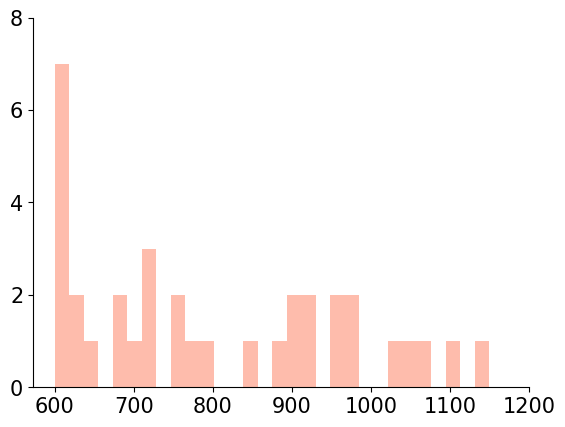

In [57]:
plt.figure()
plt.hist([df['len']],bins=30,color=['#FEBCAC'])
plt.grid(False)
plt.xticks(range(600, 1210, 100))
plt.yticks(range(0, 10, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yticks(range(0, 450, 100))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.rcParams['xtick.color']="b"
# plt.rcParams['ytick.color']="b"
# 设置 x 轴刻度线标记
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,colors='black')
# 设置 y 轴刻度线标记
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,colors='black')
# plt.axvline(x=0, linestyle='dashed', color='#3888C1',alpha=0.5)
# plt.legend(loc='upper right',fontsize="xx-large",frameon=False)#frameon去除边框
x_axis = plt.gca().spines['bottom']
y_axis = plt.gca().spines['left']

# 设置 x 轴和 y 轴的颜色为黑色
x_axis.set_color('black')
y_axis.set_color('black')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/domain.pdf')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/domain.png')
# plt.axhline(y=0, linestyle='dashed', color='#3888C1',alpha=0.5)


Figure 4b
输入：virus.phase4_final.whole.ct
输出：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 4b.pdf
代码：python

In [58]:
#读入文件
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/")
dot_dict={}
with open("SHAPE-MaP and vRIC-seq.dot","r") as F:
    for line in F:
        if line.startswith(">"):
            key = line.rstrip("\n")
            dot_dict[key] = ""
        else:
            dot_dict[key] += line.rstrip()
dot1={};dot2={};dot3={}
for key,value in dot_dict.items():
    if key=='>MK584552.1_shapemap':
        dot1[key]=value
    elif key=='>MK584552.1_vRIcseq_600':
        dot2[key]=value
    else:
        dot3[key]=value

In [64]:
count1=0;list1=[]
for v1 in dot1.values():
    for v in v1:
        list1.append(v)
        if v=='.':
            count1+=1

(len(v1)-count1)/2

6896.0

In [60]:
count2=0;list2=[]
for v2 in dot2.values():
    for v in v2:
        list2.append(v)
        if v=='.':
            count2+=1

(len(v2)-count2)/2

9203.0

In [62]:
count=0
for v1,v2 in zip(list1,list2):
    if (v1=='(' and v2=='(') or (v1==')' and v2==')'):
        count+=1
print(count/2)

2559.5


In [68]:
9203-2560

6643

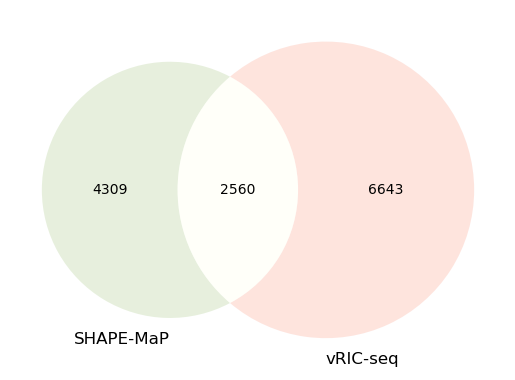

In [70]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# 创建韦恩图的数据
venn2(subsets=(4309,6643,2560),set_labels=('SHAPE-MaP','vRIC-seq'),set_colors=('#C3D9AB','#FEBCAC','#e1cbac'))
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/duplexes.pdf')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/三维数据分析流程/原始数据处理/PEDV/virion/duplexes.png')
plt.show()

In [56]:
7893-5744

2149

Figure 4c
输入：/storx/chenlei/lab-ricseq/PDCOV-089/RIC2Structure-main/6.fill_blanks_phase3_useb_600/output
输出：D:/ 360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 4c.pdf
代码：python

In [7]:
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/duplex energy/")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [8]:
##循环读入每个domain生成的ct文件，提取结构的最小自由能
raw_energy=[]
for i in range(1,31):
    with open('tmp.cycle%s.ct'%(i), 'r') as file:
        first_line = file.readline().strip()
        value=first_line.split(' ')[4].strip()
        raw_energy.append(float(value))
raw_energy

[-12.2,
 -693.3,
 -187.5,
 -240.2,
 -78.7,
 -250.5,
 -223.5,
 -396.6,
 -269.5,
 -289.3,
 -280.5,
 -288.4,
 -401.7,
 -240.7,
 -426.5,
 -499.1,
 -300.7,
 -224.3,
 -298.2,
 -367.6,
 -272.1,
 -243.9,
 -465.5,
 -686.4,
 -330.1,
 -617.9,
 -244.0,
 -675.9,
 -425.9,
 -411.3]

In [98]:
#循环读入fasta文件，保存进字典
seqdict={}
for i in range(1,31):
    with open('tmp.cycle%s.fa'%(i), 'r') as file:
        for line in file:
            if line.startswith('>'):
                key=line[1:].rstrip()
                seqdict[key] = ""
            else:
                seqdict[key]+=line.rstrip()
seqdict

{'cycle1': 'ATTTGGACAAGTCAGCGGGCTACCCCTTTAACAAGCTAGGTAAGGCTCGTAACTATT',
 'cycle2': 'ATTACGACATGACTCATGCCGAGCAAAATCAACTGTTTGAGTATACAAAACGCAATGTTTTGCCTACACTCACTCAGATGAACCTTAAGTATGCAATTTCAGCCAAGGATCGTGCTCGCACTGTGGCAGGAGTGTCTATAATTAGCACCATGACTAACAGGCAGTACCATCAAAAGATGCTGAAATCTATTTCACTTGCACGCAATCAGACCATCGTGATTGGAACAACCAAATTCTATGGTGGTTGGGACAACATGTTACGACGACTGATGTGTAATATCAACAATCCCATTTTAGTGGGTTGGGATTACCCTAAGTGTGATCGTTCTATGCCAAACATGCTGCGCATTGCCGCTTCGTGCTTGCTAGCACGAAAACACACTTGCTGTAACCAAAGCCAGCGATTCTACCGTTTGGCTAATGAATGTTGCCAAGTACTATCTGAAGTGGTAGTCTCTGGTAACAACCTCTATGTAAAACCAGGTGGCACTAGCAGTGGTGATGCAACCACAGCTTATGCCAACTCGGTATTTAACATCTTACAGGTGGTTTCTGCTAATGTAGCCACCTTCTTATCAACTTCCACCACGACACATCTTAATAAGGACATTGCGGAATTGCATCGTAGTCTTTATGAAGATATTTATCGTGGTGACTCTAATGATATCACCGTCATCAATAGATTCTACCAGCATCTCCAAAGTTACTTTGGACTTATGATATTGTCTGATGATGGTGTCGCATGCATAGACTCAGCCGTTGCAAAGGCTGGAGCTGTTGCTGATCTTGATGGTTTCCGAGACATTTTGTTTTACCAAAACAATGTTTACATGGCAGACTCAAAGTGTTGGACAGAAACTGACATGAATGTTGGCCCTCATGAATTTTGCTCACAGCATACTGTGTTAGCAGAGCA

In [79]:
#打乱并保存文件
os.makedirs('output', exist_ok=True)
shuffled_energy=[]
for key,value in seqdict.items():
    sequence=value
    for i in range(1,11):
        sequence_list = list(sequence)
        random.shuffle(sequence_list)
        shuffled_sequence = ''.join(sequence_list)
        with open(os.path.join('output', '%s_shuffled_sequence%s.fa' % (key, i)), 'w') as f:
            f.write('>'+'%s'%(i)+'\n')
            f.write(shuffled_sequence+'\n')

In [ ]:
for key,value in seqdict.items():
    for i in range(1,11):
        os.system('Fold %s_shuffled_sequence%s.fa  %s_shuffled_sequence%s.ct -mfe'%(key,i,key,i))
        with open('%s_shuffled_sequence%s.ct'%(key,i), 'r') as file:
            first_line = file.readline().strip()
            value=first_line.split(' ')[4].strip()
            shuffled_energy.append(float(value))

In [3]:
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/result/duplex energy/output")
shuffled_energy=[]
for ii in range(1,31):
    for i in range(1,11):
        with open('cycle%s_shuffled_sequence%s.ct'%(ii,i), 'r') as file:
            first_line = file.readline().strip()
            value=first_line.split(' ')[4].strip()
            shuffled_energy.append(float(value))
len(shuffled_energy)

300

In [4]:
def split_list_into_groups(lst, group_size):
    groups = []
    for i in range(0, len(lst), group_size):
        group = lst[i:i+group_size]
        groups.append(group)
    return groups

In [1]:
group_size = 10
result = split_list_into_groups(shuffled_energy, group_size)

NameError: name 'split_list_into_groups' is not defined

In [13]:
with open('mfe.txt','w')as f:
    for group,line in zip(result,raw_energy):
        f.write(str(min(group))+"\t"+str(line)+"\n")

In [17]:
df = pd.read_table("mfe.txt", sep="\t",header=None,names=["shuffled", "raw"], dtype={"shuffled": float, "raw": float})
df

,shuffled,raw
0,-14.7,-12.2
1,-609.3,-693.3
2,-158.6,-187.5
3,-240.0,-240.2
4,-76.9,-78.7
5,-242.2,-250.5
6,-219.7,-223.5
7,-344.7,-396.6
8,-258.8,-269.5
9,-255.5,-289.3


In [25]:
from scipy import stats
mean1 = np.mean(df['shuffled'])
mean2 = np.mean(df['raw'])
sem1 = stats.sem(df['shuffled'])
sem2 = stats.sem(df['raw'])
t_statistic, p_value = stats.ttest_rel(df['shuffled'],df['raw'])
p_value_scientific = "{:.2e}".format(p_value)
p_value_scientific

'3.22e-07'

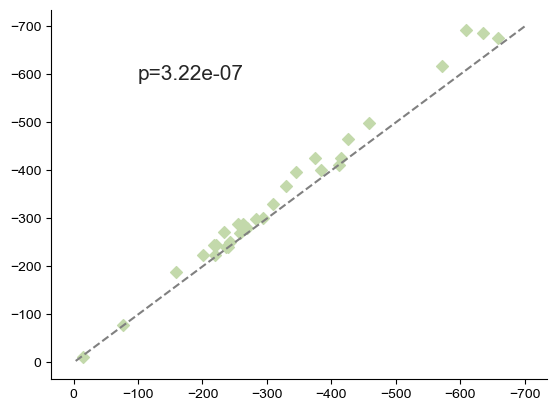

In [62]:
fig, ax = plt.subplots()
ax.scatter(df['shuffled'],df['raw'],color='#C3D9AB',marker='D')

# ax.xticks(fontsize=15)
# ax.yticks(fontsize=15)
ax.grid(False)
# ax.xticks(range(0, -700, 200))
# plt.yticks(range(0, 7, 2))
# plt.text(1, 10, f'R: {R:.2f}', ha='left', va='top',fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.invert_xaxis()
ax.invert_yaxis()
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True,colors='black')
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,colors='black')
x_axis = plt.gca().spines['bottom']
y_axis = plt.gca().spines['left']
x_axis.set_color('black')
y_axis.set_color('black')

plt.text(-100,-600, 'p=3.22e-07', ha='left', va='center', fontsize=15)

ax.plot([-700, 0], [-700, 0], linestyle='dashed', color='gray')
plt.savefig('D:/360MoveData/Users/dgwei/Desktop/文章/Scientific_data-Sunju/图片/Figure 4c.pdf')

plt.show()